In [1]:
!ls

FT-1125-bge-large-en-v1.5  decoder_only  my_data
README.md		   encoder_only  run.sh
cache			   example_data  test_model.ipynb


In [2]:
import json

query_path = "./my_data/finetune_data_minedHN.jsonl"
passage_path = "./my_data/candidate_pool.jsonl"
# Example data - replace this with your actual data
with open(query_path, "r") as f:
    queries = [f"{json.loads(line)['query']} {json.loads(line)['prompt']}" for line in f]

with open(passage_path, "r") as f:
    passages = [json.loads(line)["text"] for line in f]


/root/miniconda3/envs/kaggle_nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Query Statistics:
mean               111.854233
median             102.000000
min                 55.000000
max                429.000000
95th_percentile    187.850000
99th_percentile    250.880000
dtype: float64

Passage Statistics:
mean               15.892926
median             15.000000
min                 4.000000
max                44.000000
95th_percentile    28.000000
99th_percentile    35.000000
dtype: float64


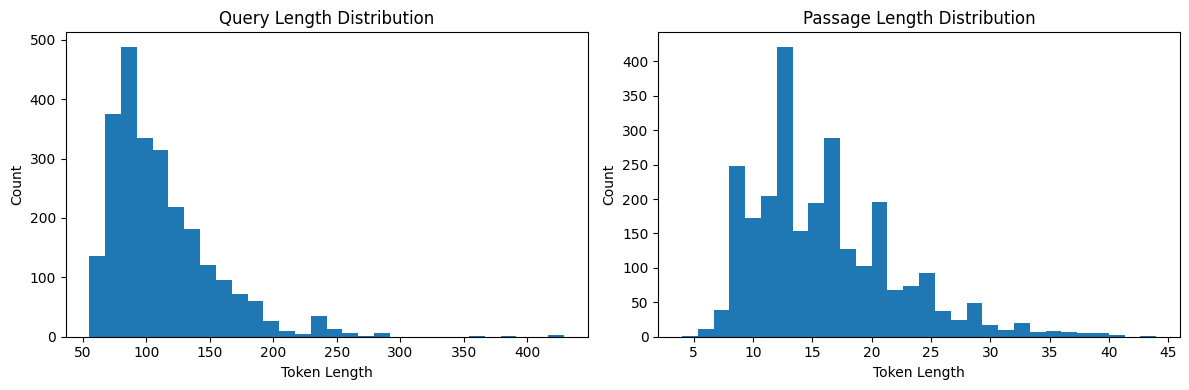

In [3]:
import torch
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the tokenizer
ft_model_path = '/root/autodl-tmp/github/FlagEmbedding/examples/finetune/embedder/FT-1125-bge-large-en-v1.5'
tokenizer = AutoTokenizer.from_pretrained(ft_model_path)

# Get token lengths
query_lengths = [len(tokenizer.encode(q)) for q in queries]
passage_lengths = [len(tokenizer.encode(p)) for p in passages]

# Calculate statistics
def get_stats(lengths):
    return {
        "mean": np.mean(lengths),
        "median": np.median(lengths),
        "min": np.min(lengths),
        "max": np.max(lengths),
        "95th_percentile": np.percentile(lengths, 95),
        "99th_percentile": np.percentile(lengths, 99)
    }

# Print statistics
print("Query Statistics:")
print(pd.Series(get_stats(query_lengths)))
print("\nPassage Statistics:")
print(pd.Series(get_stats(passage_lengths)))

# Create histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(query_lengths, bins=30)
plt.title("Query Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(passage_lengths, bins=30)
plt.title("Passage Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Count")

plt.tight_layout()
plt.show()